## 1 - Importação de Bibliotecas

In [17]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Importação de base

In [18]:
# Carregar base
df = pd.read_csv("C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/data/desmatamento_tratado.csv")

df.head()

,year,month,area,uf,classname,numpol
0,2019,8,5.20,PA,MINERACAO,58
1,2015,8,1.96,AM,MINERACAO,15
2,2015,8,0.20,MT,MINERACAO,2
3,2015,8,11.86,PA,MINERACAO,101
4,2015,9,0.11,AM,MINERACAO,1


## 3 - Variável Alvo e Features

In [19]:
# Features (variáveis explicativas) e target (variável alvo)
X = df[['year', 'month', 'uf', 'classname', 'numpol']]
y = df['area']


## 4 - Variáveis Categóricas

In [20]:
# Copiar o dataframe para evitar sobrescrever o original
X_encoded = X.copy()

# Codificar as variáveis categóricas
le_uf = LabelEncoder()
le_class = LabelEncoder()

X_encoded['uf'] = le_uf.fit_transform(X_encoded['uf'])
X_encoded['classname'] = le_class.fit_transform(X_encoded['classname'])

X_encoded.head()

,year,month,uf,classname,numpol
0,2019,8,3,2,58
1,2015,8,1,2,15
2,2015,8,2,2,2
3,2015,8,3,2,101
4,2015,9,1,2,1


## 5 - Dividir em Treino e Teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


## 6 - Normalizar os Dados

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7 - Treinamento de Modelos

## 7.1 - Regressão Linear

In [23]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

## 7.2 - Árvore de Descisão

In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

## 7.3 - Random Florest

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# 8 - Avaliar Performance

In [26]:
def avaliar_modelo(y_true, y_pred, nome_modelo):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {nome_modelo} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}\n")

avaliar_modelo(y_test, y_pred_lr, "Regressão Linear")
avaliar_modelo(y_test, y_pred_dt, "Árvore de Decisão")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")


--- Regressão Linear ---
MAE:  15.2634
RMSE: 24.5101
R²:   0.8302

--- Árvore de Decisão ---
MAE:  9.8170
RMSE: 22.9187
R²:   0.8515

--- Random Forest ---
MAE:  7.9612
RMSE: 17.5632
R²:   0.9128



# 9 - Visualização de Previsões

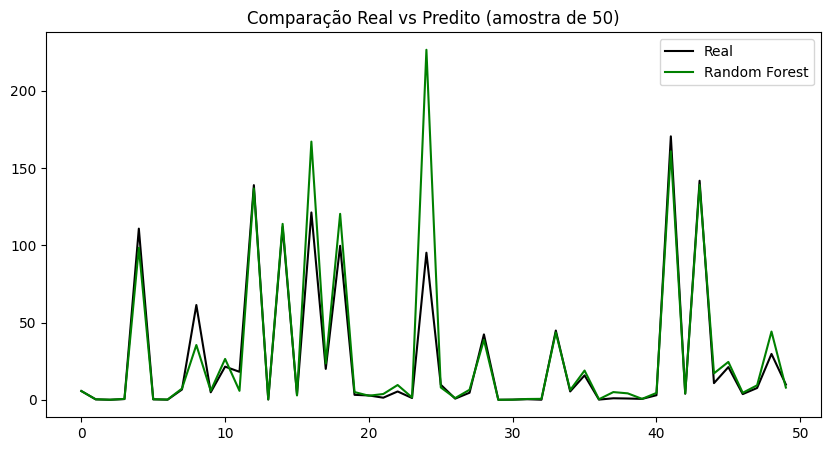

In [27]:
resultados = pd.DataFrame({
    'Real': y_test.values,
    'LR_Pred': y_pred_lr,
    'DT_Pred': y_pred_dt,
    'RF_Pred': y_pred_rf
}).reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(resultados['Real'].values[:50], label='Real', color='black')
plt.plot(resultados['RF_Pred'].values[:50], label='Random Forest', color='green')
plt.title('Comparação Real vs Predito (amostra de 50)')
plt.legend()
plt.show()


# 10 - Salvar Modelos

In [29]:
joblib.dump(rf, "C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/datamodelo_random_forest.pkl")
joblib.dump(scaler, "C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/datascaler.pkl")

# Supondo que X_encoded seja seu DataFrame de treino
joblib.dump(list(X_encoded.columns), "C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/X_columns.pkl")
print("✅ Colunas salvas com sucesso!")


✅ Colunas salvas com sucesso!
